<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/SuminLee/Project3_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**주제: 코로나 데이터 분석**

이용 데이터: covid_19_data.csv

(출처: https://www.kaggle.com/code/neelkudu28/covid-19-visualizations-predictions-forecasting?select=covid_19_data.csv&kernelSessionId=42044544)

데이터 칼럼 (8개) : SNo (번호), ObservationDate (판정일), Province/State (주),

Country/Region (국가/지역), Last Update (마지막 업데이트 날짜 시각), Confirmed (확진자 수),

Deaths (사망자 수), Recovered (완치자 수)

1) 무엇을 할 것인가?



1.   데이터 분석으로 유의미한 정보를 얻기


*   국가별로 월별 확진자 수 추이
*   항목 추가







##1.데이터 로드

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('/content/drive/MyDrive/Project3/DataSet/covid_19_data.csv')

## 2.데이터 전처리

**일단 데이터를 확인해보자**

In [57]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


**칼럼별 결측치 확인**

In [58]:
print(df['ObservationDate'].isnull().sum())
print(df['Province/State'].isnull().sum())
print(df['Country/Region'].isnull().sum())
print(df['Confirmed'].isnull().sum())
print(df['Deaths'].isnull().sum())
print(df['Recovered'].isnull().sum())

0
31153
0
0
0
0


In [59]:
len(df)

98252

총 98,252개의 데이터 중 **'Province/State'** 칼럼이 null인 데이터가 31,153개이다. (약 32%)

=> 무작위로 null 값인 것이 아니라 null 값인 국가가 있는 것이라면? 확인해보자.

In [60]:
#df[df.v1.isnull()]
df[df['Province/State'].isnull()]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,36,01/22/2020,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0
36,37,01/22/2020,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0
37,38,01/22/2020,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0
73,74,01/23/2020,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0
74,75,01/23/2020,NaN,Thailand,1/23/20 17:00,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
97673,97674,08/29/2020,NaN,West Bank and Gaza,2020-08-30 04:28:22,21668.0,147.0,14631.0
97674,97675,08/29/2020,NaN,Western Sahara,2020-08-30 04:28:22,10.0,1.0,8.0
97675,97676,08/29/2020,NaN,Yemen,2020-08-30 04:28:22,1946.0,563.0,1113.0
97676,97677,08/29/2020,NaN,Zambia,2020-08-30 04:28:22,11902.0,284.0,11092.0


In [61]:
df[df['Country/Region'] == 'Japan']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,36,01/22/2020,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0
73,74,01/23/2020,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0
119,120,01/24/2020,NaN,Japan,1/24/20 17:00,2.0,0.0,0.0
160,161,01/25/2020,NaN,Japan,1/25/20 17:00,2.0,0.0,0.0
206,207,01/26/2020,NaN,Japan,1/26/20 16:00,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...
98195,98196,08/29/2020,Unknown,Japan,2020-08-30 04:28:22,8.0,0.0,8.0
98227,98228,08/29/2020,Wakayama,Japan,2020-08-30 04:28:22,230.0,5.0,210.0
98236,98237,08/29/2020,Yamagata,Japan,2020-08-30 04:28:22,77.0,1.0,76.0
98237,98238,08/29/2020,Yamaguchi,Japan,2020-08-30 04:28:22,158.0,0.0,87.0


일본으로 확인을 해본 결과 무작위로 null 값이 있는 것임을 확인하였다.

## 2.1.칼럼 추가 (날짜 데이터 분리)

In [62]:
import datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [63]:
df['year'] = df['ObservationDate'].dt.year #연도
df['month'] = df['ObservationDate'].dt.month #월
df['day'] = df['ObservationDate'].dt.day #일
df['dayofweek'] = df['ObservationDate'].dt.dayofweek #요일 (월 = 0)

In [64]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,year,month,day,dayofweek
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020,1,22,2
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020,1,22,2
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020,1,22,2
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020,1,22,2
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020,1,22,2


**월별 확진자 추이 확인**

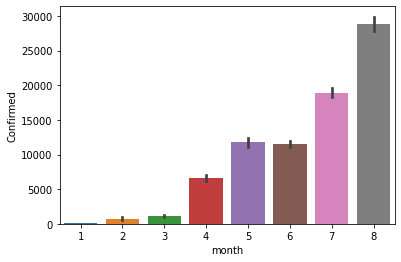

In [65]:
#fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) =plt.subplots(nrows=3, ncols=2)
#fig.set_size_inches(20,18)

sns.barplot(data=df, x="month", y="Confirmed")

#sns.barplot(data=df, x="Country/Region", y="Confirmed", ax=ax3)
# sns.barplot(data=df, x="Hour", y="Rented Bike Count", ax=ax4)
# sns.barplot(data=df, x="Temperature(℃)", y="Rented Bike Count", ax=ax5)
# sns.barplot(data=df, x="Rainfall(mm)", y="Rented Bike Count", ax=ax6)

어느 나라의 데이터가 가장 많을까? 데이터가 많다고 확진자수가 많은 것일까?

In [66]:
# 가장 데이터가 많은 나라: US
df['Country/Region'].value_counts()

US                     10906
Russia                  7592
Mainland China          6849
Japan                   4682
Mexico                  3347
                       ...  
North Ireland              1
Channel Islands            1
Cape Verde                 1
Republic of Ireland        1
East Timor                 1
Name: Country/Region, Length: 223, dtype: int64

In [67]:
# 나라 종류
country = df['Country/Region'].unique()

In [68]:
# 딕셔너리에 "국가: 총 확진자수" 를 담는다.
dic = {}
for country in country:
  #print(country)
  Confirmed_sum = df[df['Country/Region'] == country]['Confirmed'].sum()
  dic[country] = Confirmed_sum
print(dic)

{'Mainland China': 16767917.0, 'Hong Kong': 287689.0, 'Macau': 7731.0, 'Taiwan': 71439.0, 'US': 396234081.0, 'Japan': 3641525.0, 'Thailand': 477409.0, 'South Korea': 2169954.0, 'Singapore': 5315142.0, 'Philippines': 7866843.0, 'Malaysia': 1178389.0, 'Vietnam': 68654.0, 'Australia': 1685474.0, 'Mexico': 31500257.0, 'Brazil': 194933354.0, 'Colombia': 21071787.0, 'France': 29770550.0, 'Nepal': 1545819.0, 'Canada': 13419076.0, 'Cambodia': 25630.0, 'Sri Lanka': 262146.0, 'Ivory Coast': 1167364.0, 'Germany': 28431964.0, 'Finland': 967038.0, 'United Arab Emirates': 5768319.0, 'India': 122656809.0, 'Italy': 35112643.0, 'UK': 37857807.0, 'Russia': 75257596.0, 'Sweden': 7717556.0, 'Spain': 38921479.0, 'Belgium': 8791371.0, 'Others': 26228.0, 'Egypt': 7310357.0, 'Iran': 30414143.0, 'Israel': 5629678.0, 'Lebanon': 452435.0, 'Iraq': 8623559.0, 'Oman': 5267943.0, 'Afghanistan': 3169169.0, 'Bahrain': 3261216.0, 'Kuwait': 5577579.0, 'Austria': 2799963.0, 'Algeria': 2394260.0, 'Croatia': 516305.0, 'Swi

In [69]:
#확진자 수가 많은 순으로 정렬
sorted_country = sorted(dic.items(), key=lambda x: x[1], reverse=True)
for country in sorted_country:
  print(country)


('US', 396234081.0)
('Brazil', 194933354.0)
('India', 122656809.0)
('Russia', 75257596.0)
('Spain', 38921479.0)
('UK', 37857807.0)
('Peru', 35981065.0)
('Italy', 35112643.0)
('Mexico', 31500257.0)
('Iran', 30414143.0)
('South Africa', 29775470.0)
('France', 29770550.0)
('Chile', 28681903.0)
('Germany', 28431964.0)
('Turkey', 26027218.0)
('Pakistan', 22175349.0)
('Saudi Arabia', 22058772.0)
('Colombia', 21071787.0)
('Bangladesh', 17630785.0)
('Mainland China', 16767917.0)
('Argentina', 13597651.0)
('Canada', 13419076.0)
('Qatar', 10145658.0)
('Belgium', 8791371.0)
('Iraq', 8623559.0)
('Indonesia', 8468379.0)
('Ecuador', 7908068.0)
('Philippines', 7866843.0)
('Sweden', 7717556.0)
('Egypt', 7310357.0)
('Netherlands', 7225248.0)
('Belarus', 6711726.0)
('Ukraine', 6199822.0)
('United Arab Emirates', 5768319.0)
('Kazakhstan', 5718676.0)
('Israel', 5629678.0)
('Portugal', 5623957.0)
('Kuwait', 5577579.0)
('Bolivia', 5320994.0)
('Singapore', 5315142.0)
('Oman', 5267943.0)
('Dominican Republic'

어느 나라의 데이터가 가장 많을까? 데이터가 많다고 확진자수가 많은 것일까?


1.   데이터 수가 많은 나라

*   (1) US (2) Russia (3) Mainland China (4) Japan (5) Mexico

2.   확진자 수가 많은 나라
*   (1) US (2) Brazil (3) India (4) Russia (5) Spain

=> 둘의 흐름이 어떻게 다를까?



In [70]:
#데이터 수가 많은 나라
df_US = df[df['Country/Region'] == 'US']
df_Russia = df[df['Country/Region'] == 'Russia']
df_China  = df[df['Country/Region'] == 'Mainland China']

In [71]:
print(df['Confirmed'].sum())
print(df_US['Confirmed'].sum())
print(df_Russia['Confirmed'].sum())
print(df_China['Confirmed'].sum())

1517276871.0
396234081.0
75257596.0
16767917.0


In [72]:
#확진자 수가 많은 나라
df_Brazil = df[df['Country/Region'] == 'Brazil']
df_India = df[df['Country/Region'] == 'India']
df_Spain  = df[df['Country/Region'] == 'Spain']

In [73]:
print(df['Confirmed'].sum())
print(df_Brazil['Confirmed'].sum())
print(df_India['Confirmed'].sum())
print(df_Spain['Confirmed'].sum())

1517276871.0
194933354.0
122656809.0
38921479.0


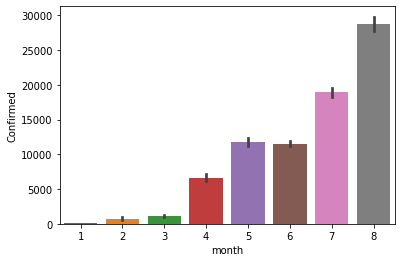

In [74]:
#전세계 월별 확진자 수
sns.barplot(data=df, x="month", y="Confirmed")

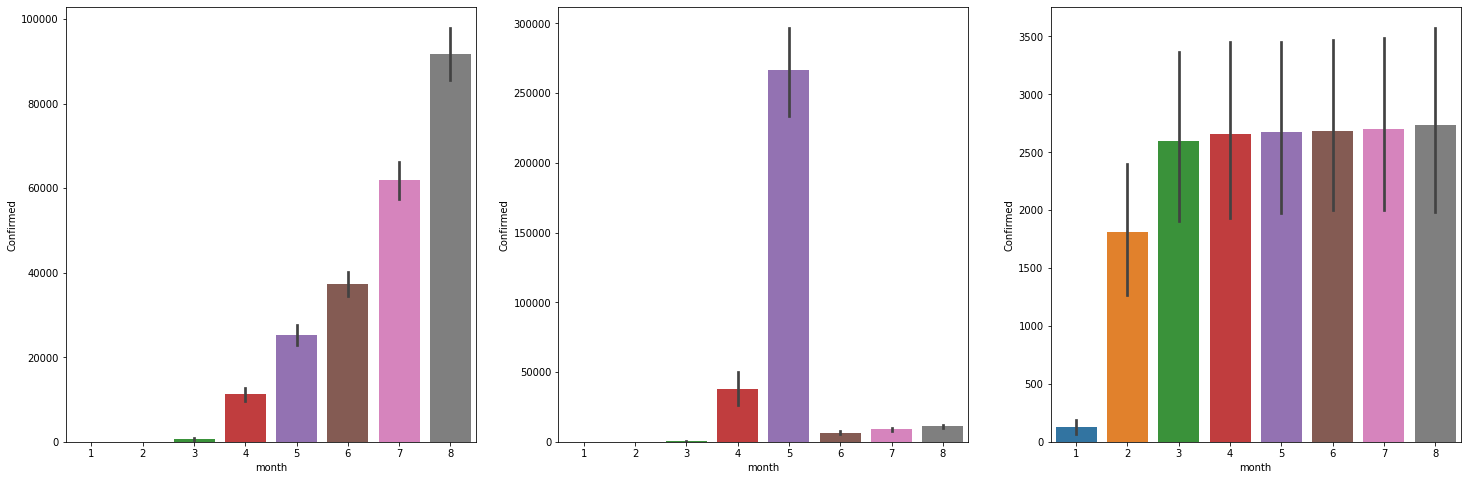

In [75]:
#데이터가 많은 나라의 확진자 수 (US, Russia, China)
fig,((ax1,ax2, ax3)) =plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(25,8)

sns.barplot(data=df_US, x="month", y="Confirmed", ax=ax1)
sns.barplot(data=df_Russia, x="month", y="Confirmed", ax=ax2)
sns.barplot(data=df_China, x="month", y="Confirmed", ax=ax3)

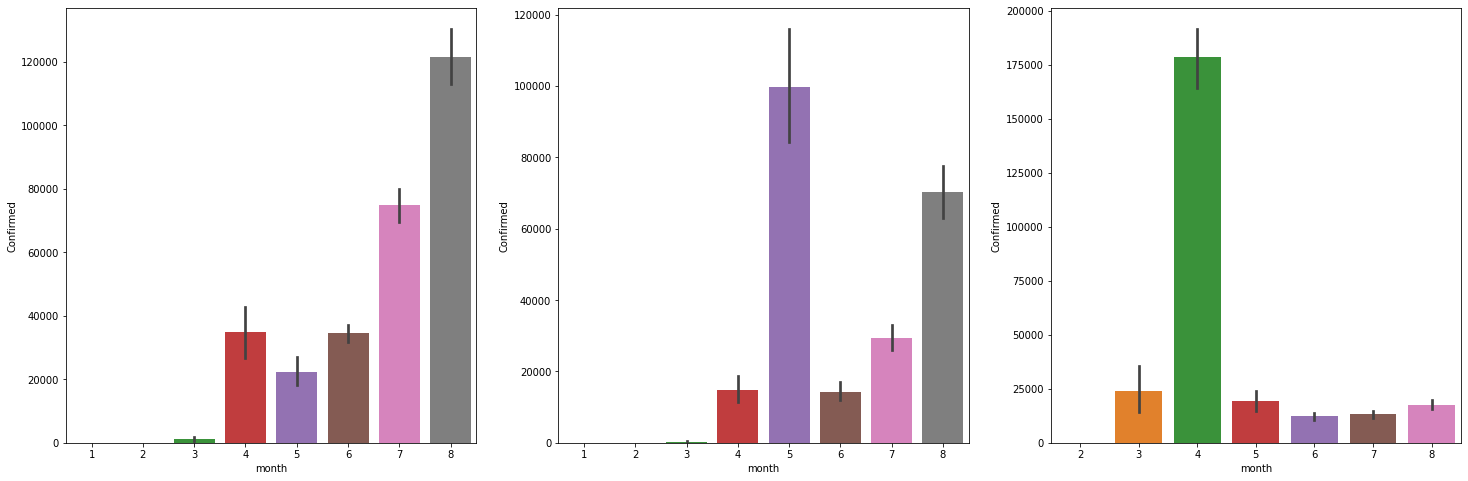

In [76]:
#확진자 수가 많은 나라의 확진자 수 (Brazil, India, Spain)
fig,((ax1,ax2, ax3)) =plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(25,8)

sns.barplot(data=df_Brazil, x="month", y="Confirmed", ax=ax1)
sns.barplot(data=df_India, x="month", y="Confirmed", ax=ax2)
sns.barplot(data=df_Spain, x="month", y="Confirmed", ax=ax3)

순서: 브라질, 인도, 스페인

전세계 월별 확진자 흐름: 갈수록 증가하면서 7, 8월에 집중되어 있다.

전세계 월별 확진자 흐름과 비슷한 국가: US, Brazil

전세계 월별 확진자 흐름과 다른 국가: Russia, China, India, Spain
- ***어떻게 다른가?***
- Russia: 5월에 집중되어 있다.
- China: 중국에서 코로나가 시작되었다. 그래서 1월에도 확진자가 있고 월별로 고르게 분포한다.
- India: 7, 8월에도 많은 확진자가 있지만 5월에 가장 많다.
- Spain: 4월에 집중되어 있다.

나의 생각
- US의 확진자 수가 가장 많기 때문에 전세계 흐름과 비슷할 수밖에 없을 것이다. 
- 유독 집중된 달이 있는 국가들은 어떤 이유가 있는 것일까?


## 2.2 국가별 집중 감염

1) ***Russia***: 5월에 집중되어 있다.

<img src = "https://drive.google.com/uc?id=1A5c6LarL7EVa8tjOcTag8FG1-UIzuywB" height=300 width=550>
<img src = "https://drive.google.com/uc?id=1liW2qCGm_d0CfSSabwkhfSEITlM5EDbh" height=500 width=550>

참고 자료: 정민현, 민지영. (2022). 러시아의 코로나19 확산 동향과 
경제회복 전망. KIEP 세계경제 포커스, Vol. 3 No. 19, 3-4.


***정리***
- 유럽에서 코로나 감염자 유입, 코로나 휴가로 확산을 막을 수는 없었음, 안전수칙을 준수하지 않음, 총 검사 수 증가 => *코로나 급증*